In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (t : trial_type)
#### Load data and check data head
##### Use control.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataCon = hddm.load_csv('./rt_dataframes/control.csv')
dataCon.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataCon = dataCon.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataCon['rt'] = dataCon['rt']/1000
dataCon.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


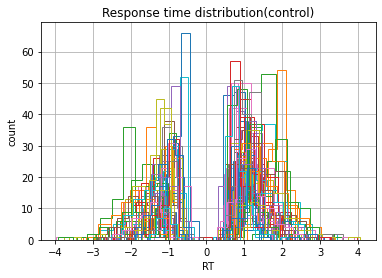

In [4]:
#flip the error RTs to be negative
dataCon = hddm.utils.flip_errors(dataCon)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(control)')
for i, subj_data in dataCon.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/rt_distribution(con).png')

## Fitting the hierarchical model for one condition with no subject effects for control participants

In [5]:
m = hddm.HDDM(dataCon,depends_on={'t': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(allparameter)/traces(2CCon_t)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(allparameter)/model(2CCon_t)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 6972.0 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(101)
Plotting t(102)
Plotting t_std
Plotting sv
Plotting sz
Plotting st
Plotting z
Plotting z_std


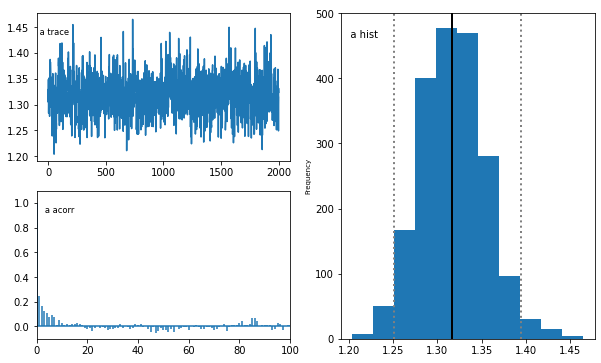

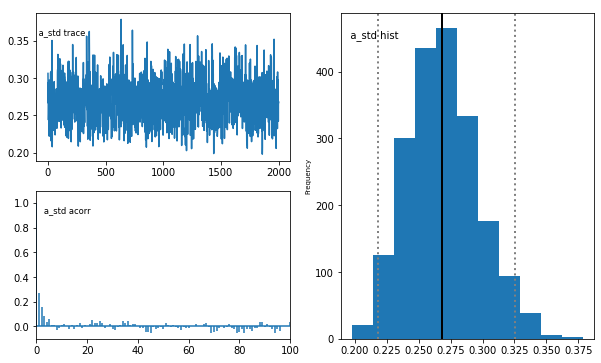

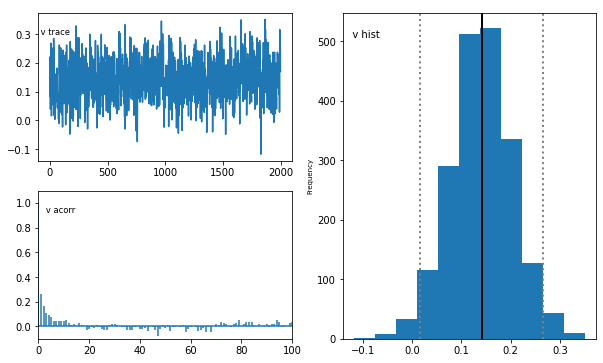

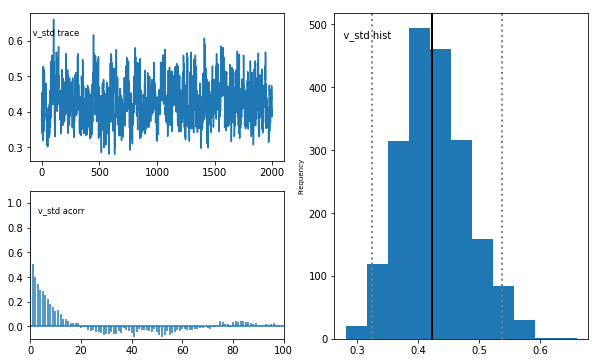

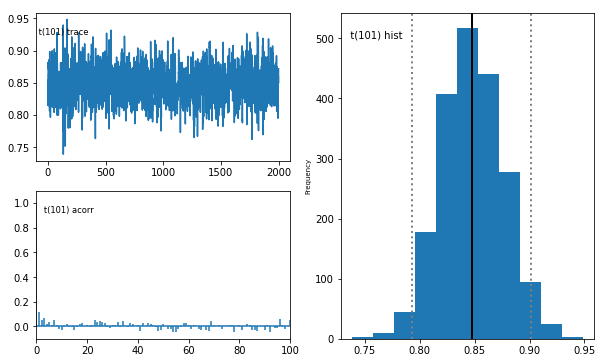

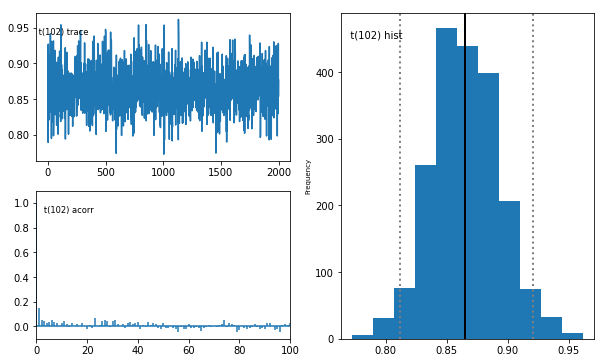

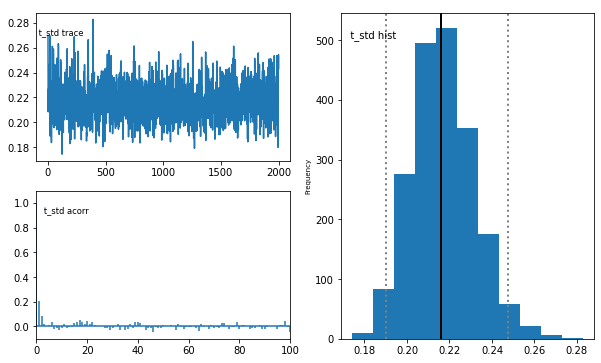

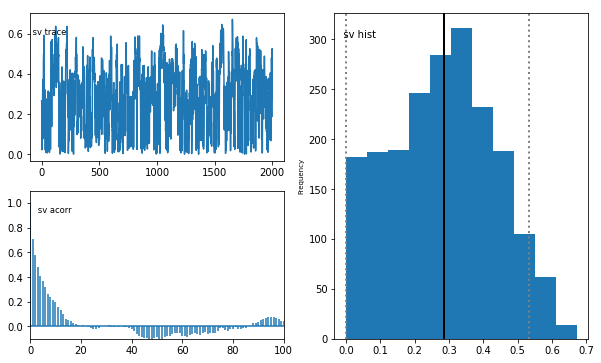

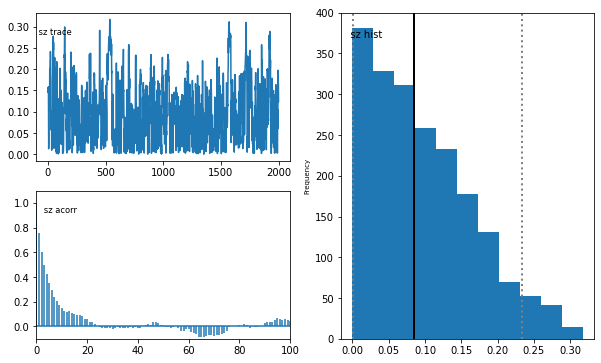

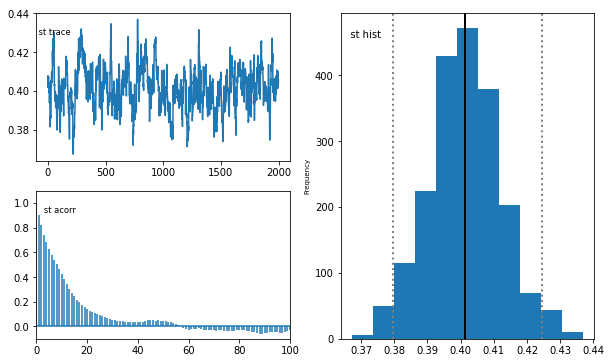

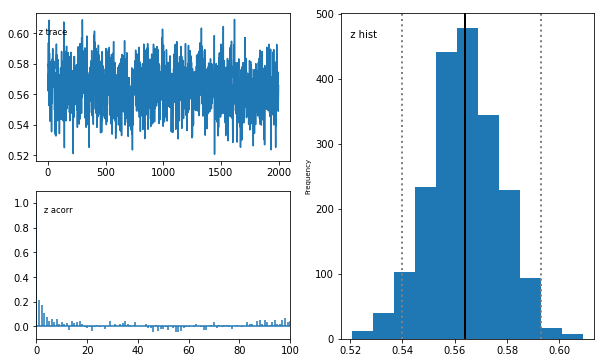

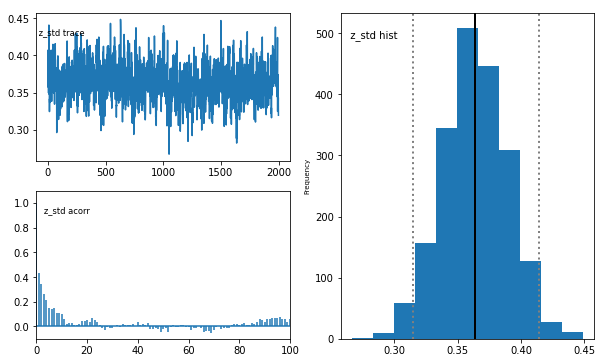

In [6]:
# plot posteriors
m.plot_posteriors(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])

In [9]:
stats2Ca = m.gen_stats()
stats2Ca.to_csv('./fitting_results/HDDM/HDDM2C(allparameter)/HDDM2CCon_t.csv', sep=',')
stats2Ca[stats2Ca.index.isin(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.318,0.0367295,1.24904,1.29269,1.31679,1.3427,1.39372,0.00132425
a_std,0.269122,0.0277295,0.220232,0.249301,0.268284,0.286495,0.328751,0.000897556
v,0.140941,0.0632358,0.0157114,0.100626,0.141038,0.182261,0.267289,0.00237227
v_std,0.426707,0.0552714,0.330831,0.388482,0.422765,0.46089,0.548502,0.00302405
t_std,0.217005,0.0147644,0.190201,0.20688,0.216026,0.226276,0.248252,0.000436645
sv,0.281982,0.151014,0.0159591,0.168538,0.287086,0.391649,0.568673,0.00930821
sz,0.0970017,0.0702982,0.00346534,0.0386464,0.0847136,0.143345,0.264325,0.00434603
st,0.401338,0.0109005,0.379646,0.394519,0.401195,0.40868,0.424493,0.000844507
z,0.563972,0.0134773,0.536783,0.555501,0.563967,0.572843,0.590499,0.000478072
z_std,0.363997,0.0257593,0.313676,0.346779,0.36372,0.381557,0.413448,0.00116351


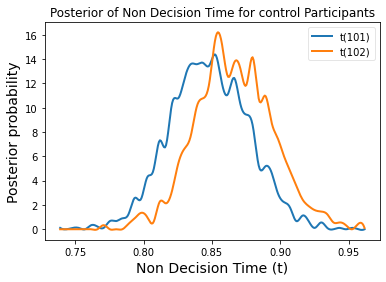

In [10]:
t_101, t_102 = m.nodes_db.node[['t(101)', 't(102)']]
hddm.analyze.plot_posterior_nodes([t_101, t_102])
plt.xlabel('Non Decision Time (t)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of Non Decision Time for control Participants', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/posterior_tCon(101,102).png')

In [11]:
m.dic

15099.184310752544

## Check for model convergence

In [ ]:
# Set up models list to append results
models = list()

In [ ]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data, depends_on={'t': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2Ct_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2CtCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [ ]:
num_chains = 5
data_chains = [(dataCon,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 1Fitting chain 0

Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------94%----------------  ] 2846 of 3000 complete in 599.8 sec                0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec  [                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 7 of 3000 complete in 1.2 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[           

In [ ]:
models

In [ ]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 0.9999705181765829
a_std: 0.999793987428946
a_subj.02535fcf7e16bb56: 1.0021601935010407
a_subj.09ba82a2ca814481: 0.9999252966134272
a_subj.0abfc32a4d12c731: 1.0000721006809918
a_subj.0b0a94c202d0b233: 1.0002889796144057
a_subj.0d894551bc966608: 1.0001740263852512
a_subj.15e0c065b2c11595: 1.000468100820017
a_subj.163b12703c8e5c3c: 1.0002897239363049
a_subj.1bf86ff948486447: 0.9998734426357994
a_subj.1cb976bac3a2016b: 1.00011648871048
a_subj.22d84796012679e8: 1.0003011789963714
a_subj.247384e4eccc4f80: 1.0002042293225801
a_subj.27902f23b60a7b76: 1.0004335874590964
a_subj.296a71628065dfa8: 1.0565843475108567
a_subj.371fb6652968f25f: 1.0001200433935553
a_subj.3ddf191ed8c33c57: 0.9998657289742315
a_subj.414f1040212a659b: 0.999838228937788
a_subj.46fd6e0b3b5c1df3: 1.0000096924890245
a_subj.4866612e834a9f5a: 1.00158238128007
a_subj.4a43f99c56b2a634: 0.9998855403707881
a_subj.4e3de1ed1c0d6103: 1.0000603032534277
a_subj.5497867d4afb5993: 1.0002426111275806
a_subj.582ab220066afebc: 1.00078172

In [ ]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'t_subj.296a71628065dfa8': 1.1039407452875323}

Values smaller than the threshold:
{}


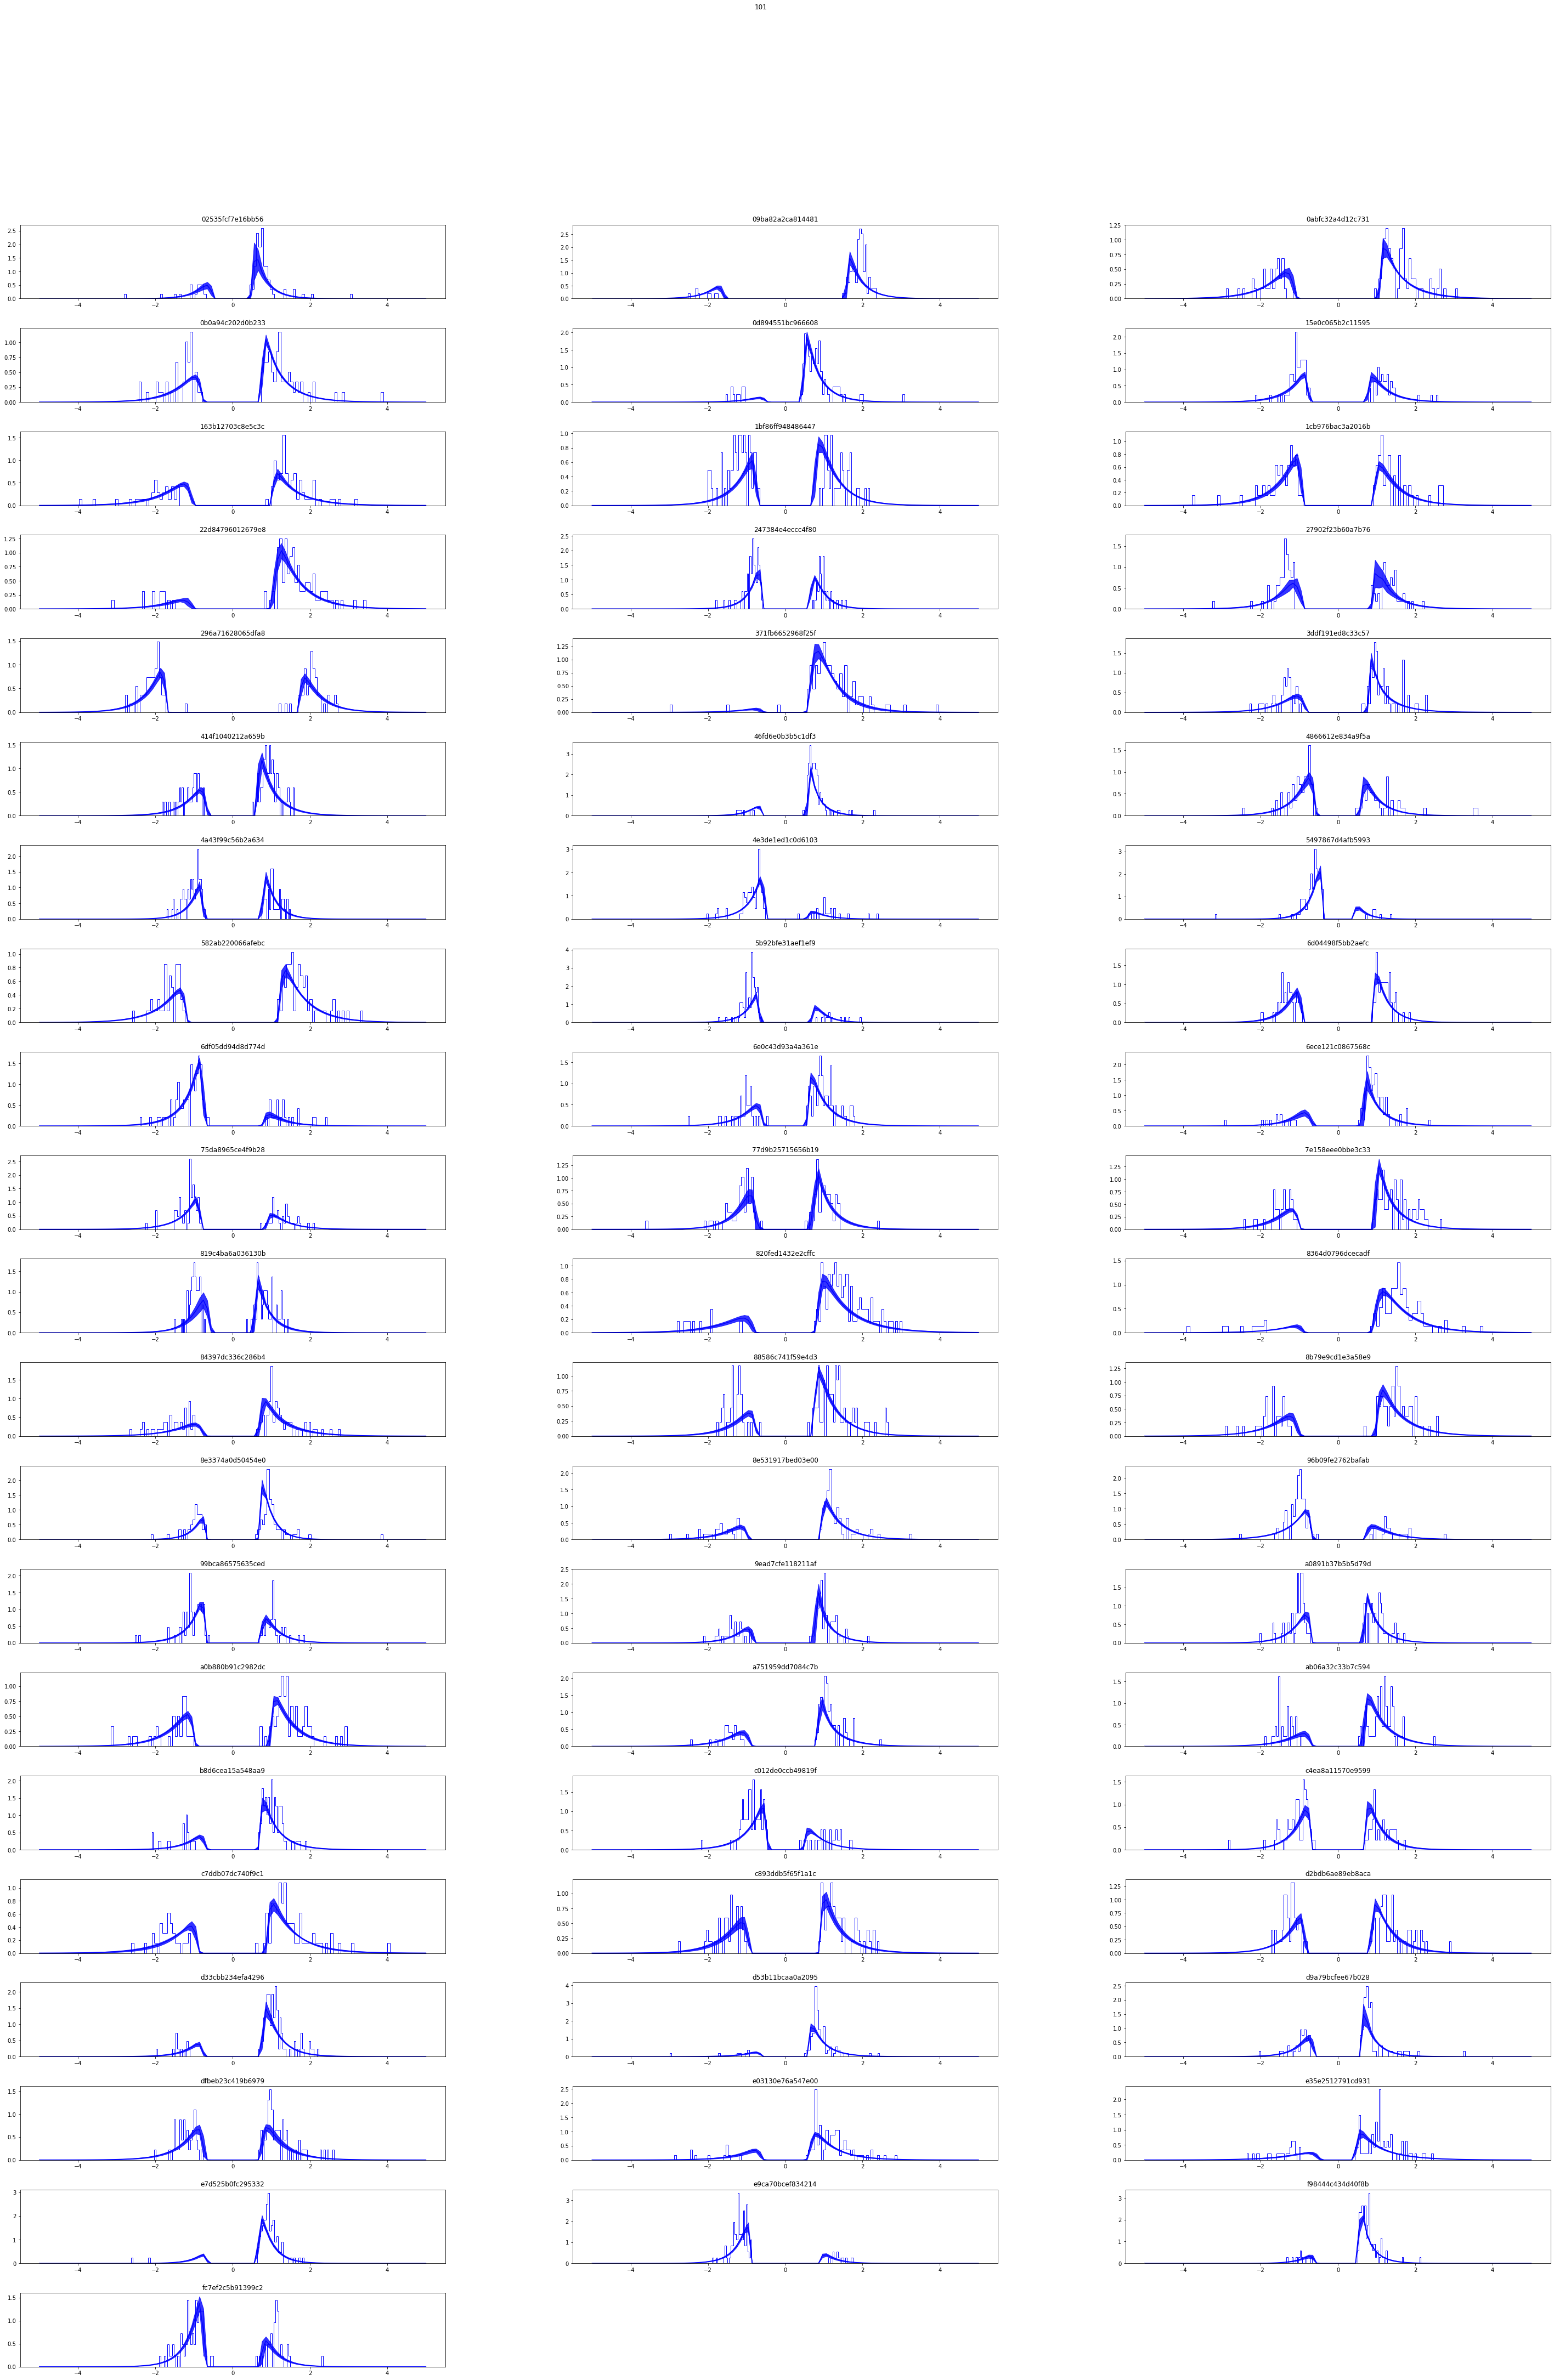

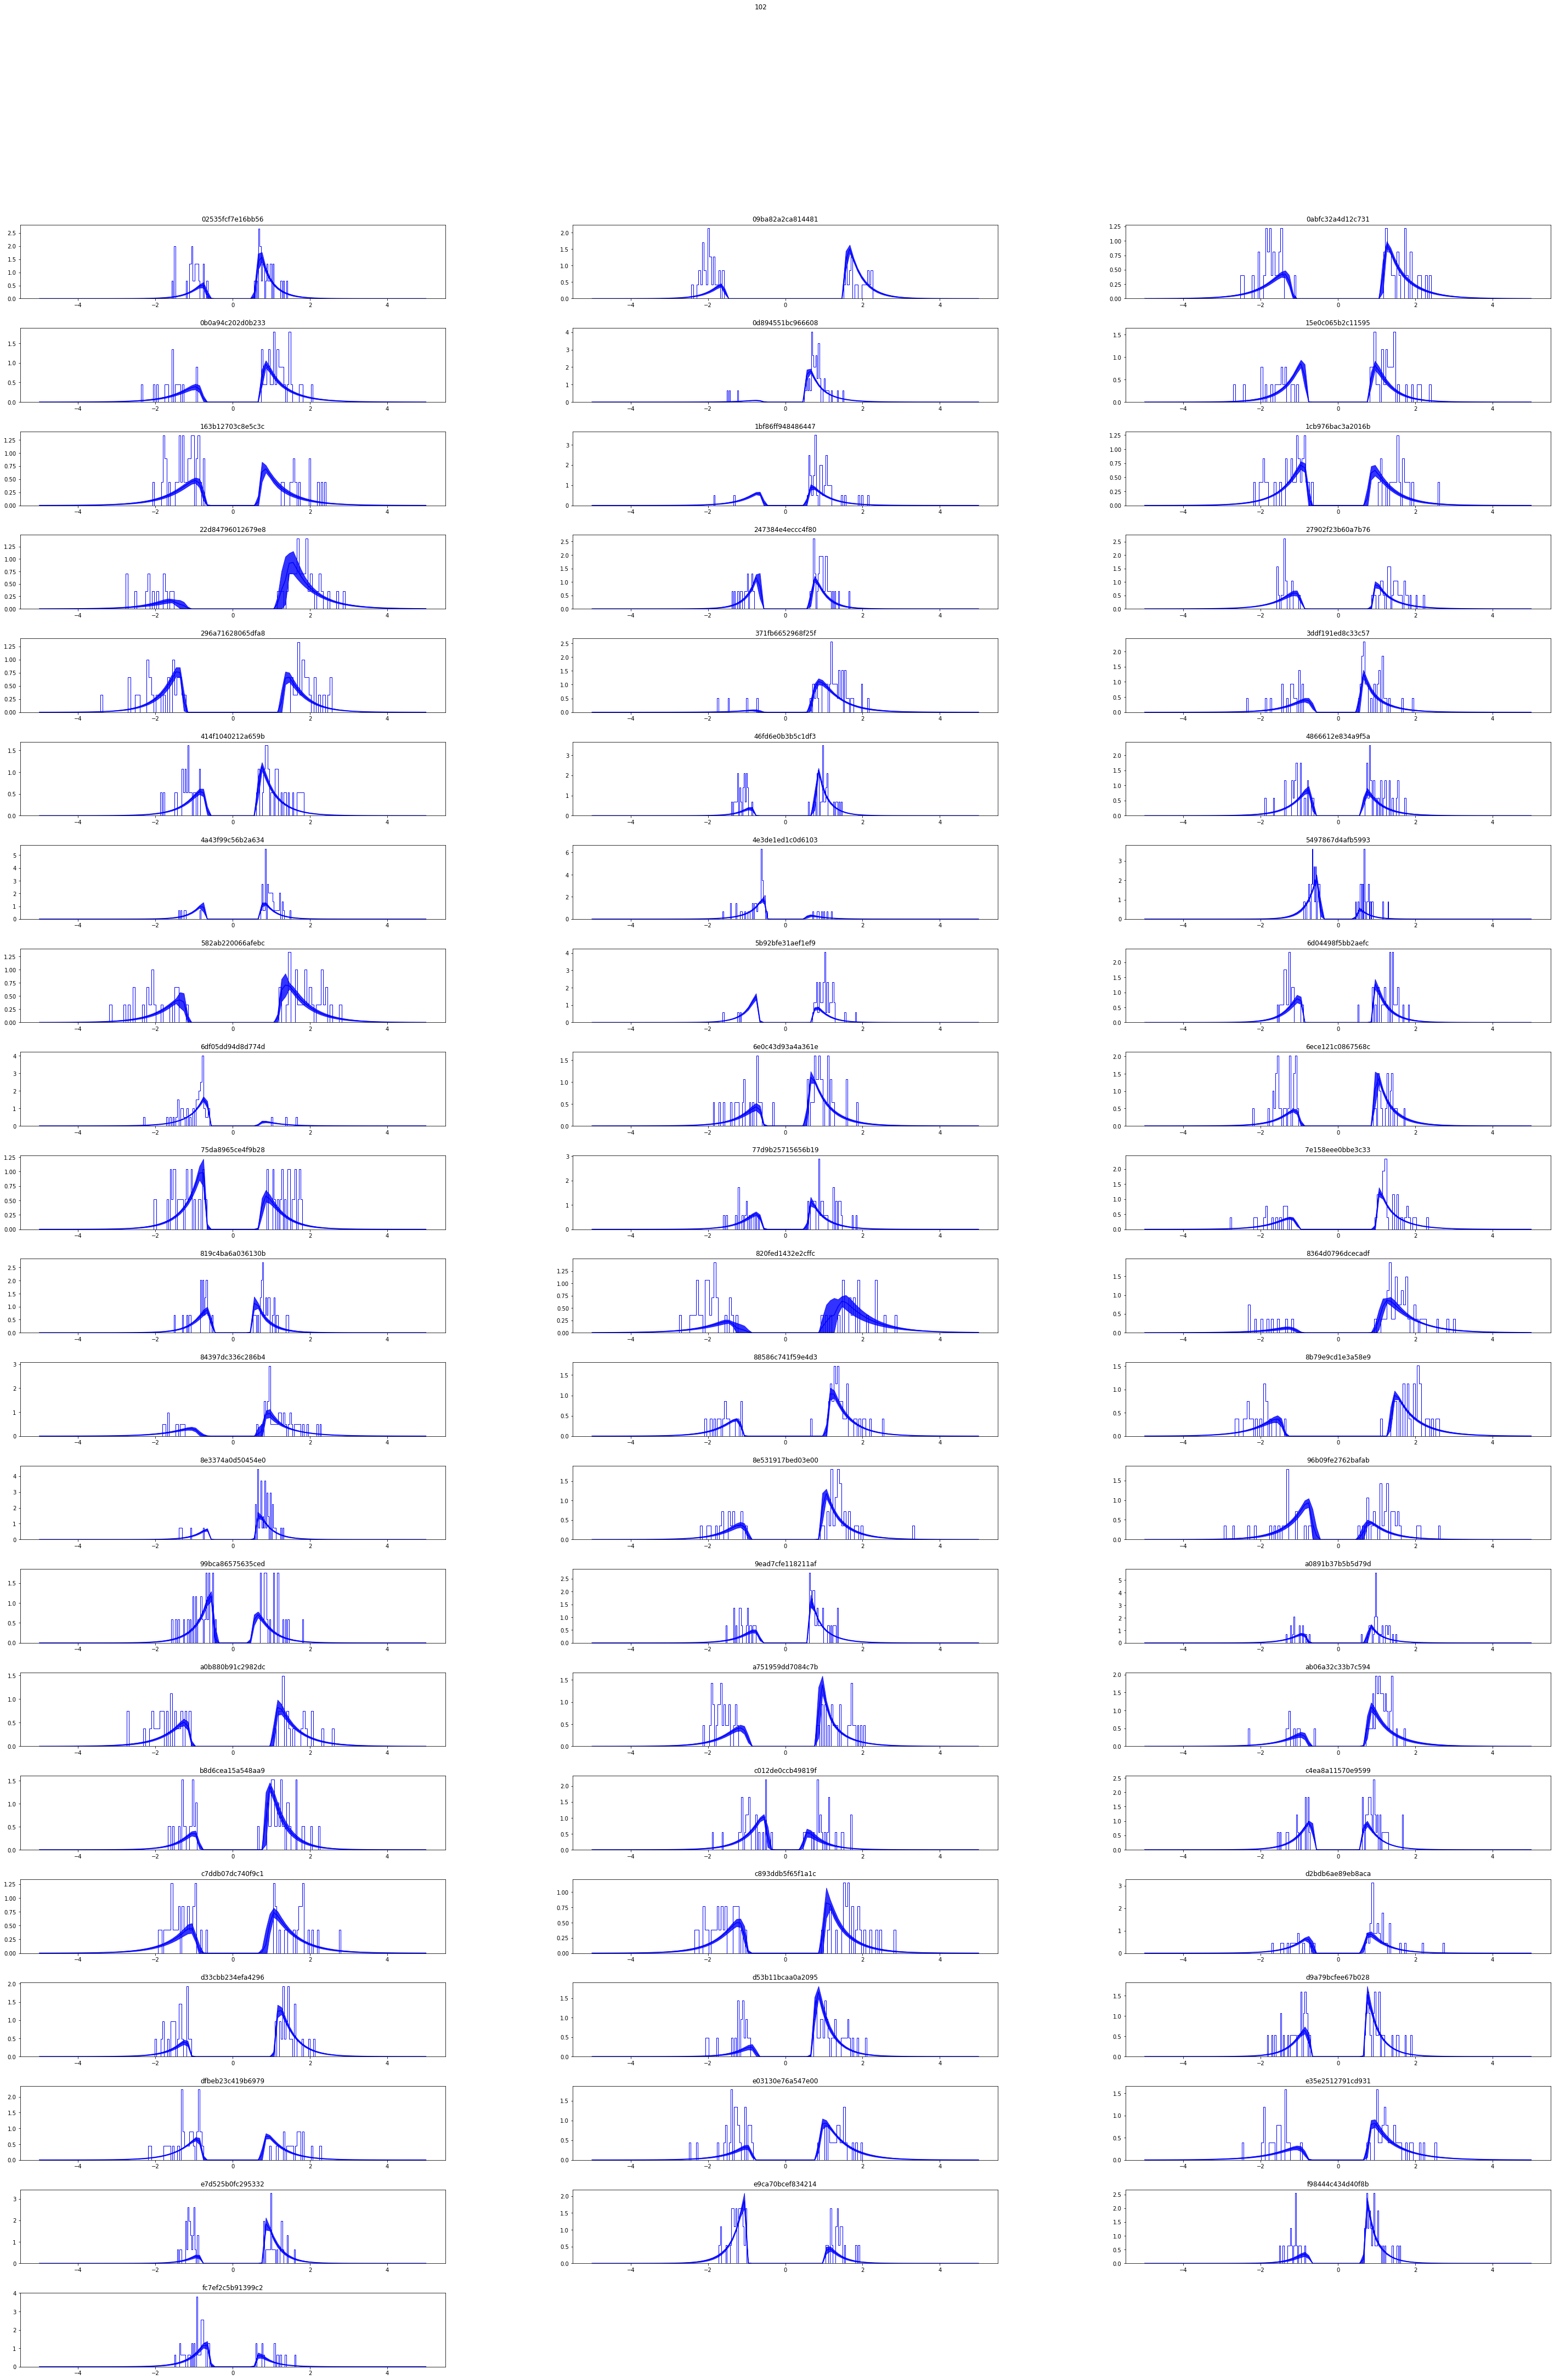

In [ ]:
m.plot_posterior_predictive(figsize=(50, 70))